# Join two dataframes and load the output as a new table in the database

In [1]:
# Dependencies 

## To access the MySQL database
from sqlalchemy import create_engine
from config import password

## In case pymysql is not yet installed in the local station 
import pymysql
pymysql.install_as_MySQLdb()

## For data processing and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a connection to the database
conn = "root:{0}@localhost:3306/diabetes_db".format(password) # Password is in a separate file
engine = create_engine(f"mysql://{conn}")

In [4]:
# Confirm presence of tables
engine.table_names()

['diabetes', 'merged', 'obesity']

## Extract data from the diabetes database

In [5]:
# Read the table contents (for diabetes)
diabetes = pd.read_sql("select * from diabetes", con = engine)
diabetes = diabetes.sort_values(by = "US_State")

# Preview the table contents
diabetes.head()

,Year,US_State,Adult_Diabetics_Percent
2,2012,Alabama,12.2
55,2014,Alabama,12.9
1,2012,Alaska,7
54,2014,Alaska,7.4
4,2012,Arizona,10.6


In [6]:
# Read the table contents (for obesity)
obesity = pd.read_sql("select * from obesity", con = engine)
obesity = obesity.sort_values(by = "US_State")

# Preview the table contents
obesity.head()

,Year,US_State,Obese_Children_Percent
0,2010,Alabama,15.8
1,2012,Alabama,15.6
2,2014,Alabama,16.3
3,2010,Alaska,21.2
4,2012,Alaska,20.6


## Transform the data (merging dataframes)

In [7]:
# Merge diabetes and obesity dataframes
merged = pd.merge(diabetes, obesity, on=['Year','US_State'], how='inner')
    # inner join is used to retain only the contents that have common year & 
    # US state combinations

# Preview the new data frame
merged.head()

,Year,US_State,Adult_Diabetics_Percent,Obese_Children_Percent
0,2012,Alabama,12.2,15.6
1,2014,Alabama,12.9,16.3
2,2012,Alaska,7,20.6
3,2014,Alaska,7.4,19.1
4,2012,Arizona,10.6,14.9


## Load the data as a new table in the diabetes database

In [8]:
# Load the "merged" dataframe into the diabetes database in a table called "merged"
merged.to_sql(name = "merged", con = engine, if_exists = "replace", index = False)
    # if_exists = "replace" ensures that when the code is run again, the existing database 
    # table won't have duplicate copies

In [9]:
# Preview the contents of the new database table, "merged"
pd.read_sql_query("select * from merged", con = engine).head()

,Year,US_State,Adult_Diabetics_Percent,Obese_Children_Percent
0,2012,Alabama,12.2,15.6
1,2014,Alabama,12.9,16.3
2,2012,Alaska,7,20.6
3,2014,Alaska,7.4,19.1
4,2012,Arizona,10.6,14.9


## Visualise the data

In [10]:
# Convert None values to NAN
merged.fillna(value = pd.np.nan, inplace = True)
merged

,Year,US_State,Adult_Diabetics_Percent,Obese_Children_Percent
0,2012,Alabama,12.2,15.6
1,2014,Alabama,12.9,16.3
2,2012,Alaska,7,20.6
3,2014,Alaska,7.4,19.1
4,2012,Arizona,10.6,14.9
5,2014,Arizona,10,13.3
6,2012,Arkansas,11.3,14.6
7,2014,Arkansas,12.7,14.4
8,2014,California,10.3,16.6
9,2012,California,9.8,17.6


In [11]:
merged["Adult_Diabetics_Percent"] = merged["Adult_Diabetics_Percent"].astype(float)
merged.dtypes

Year                         int64
US_State                    object
Adult_Diabetics_Percent    float64
Obese_Children_Percent     float64
dtype: object

In [12]:
# Create a dataframe for 2012 data
merged_2012 = merged[merged["Year"] == 2012]
merged_2012.head()

,Year,US_State,Adult_Diabetics_Percent,Obese_Children_Percent
0,2012,Alabama,12.2,15.6
2,2012,Alaska,7.0,20.6
4,2012,Arizona,10.6,14.9
6,2012,Arkansas,11.3,14.6
9,2012,California,9.8,17.6


In [13]:
# Create a dataframe for 2014 data
merged_2014 = merged[merged["Year"] == 2014]
merged_2014.head()

,Year,US_State,Adult_Diabetics_Percent,Obese_Children_Percent
1,2014,Alabama,12.9,16.3
3,2014,Alaska,7.4,19.1
5,2014,Arizona,10.0,13.3
7,2014,Arkansas,12.7,14.4
8,2014,California,10.3,16.6


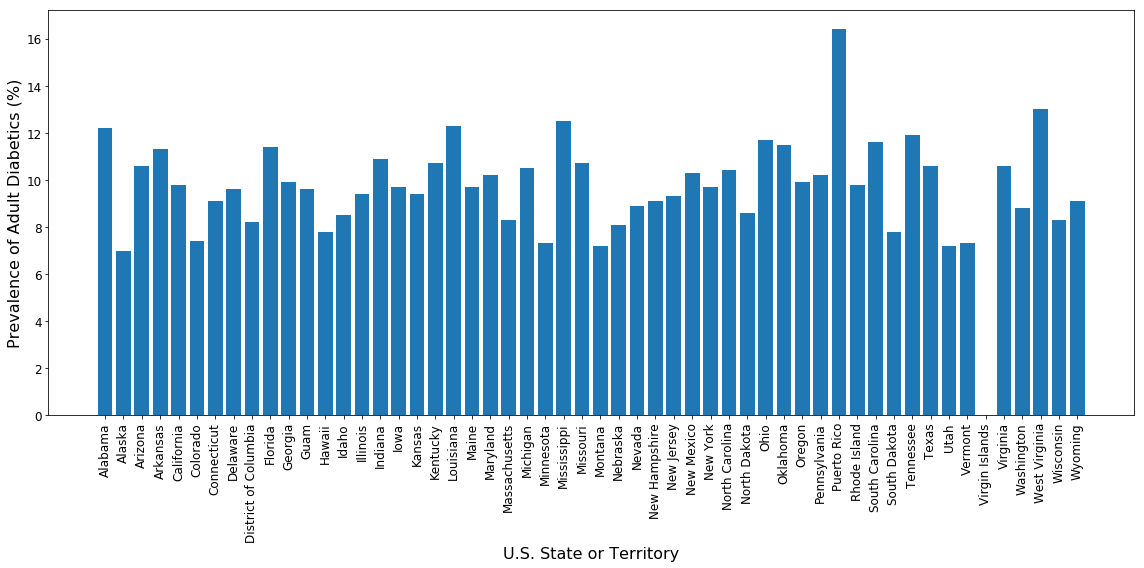

In [14]:
# Bar charts for diabetics 2012
x_pos = np.arange(len(merged_2012["US_State"]))
diabetics_2012 = list(merged_2012["Adult_Diabetics_Percent"])

plt.figure(figsize = (16,8))
plt.bar(x_pos, diabetics_2012)
plt.xticks(x_pos, merged_2012["US_State"], rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("U.S. State or Territory", fontsize = 16)
plt.ylabel("Prevalence of Adult Diabetics (%)", fontsize = 16)
plt.tight_layout()
plt.savefig("Images/states_diabetics_2012.png")

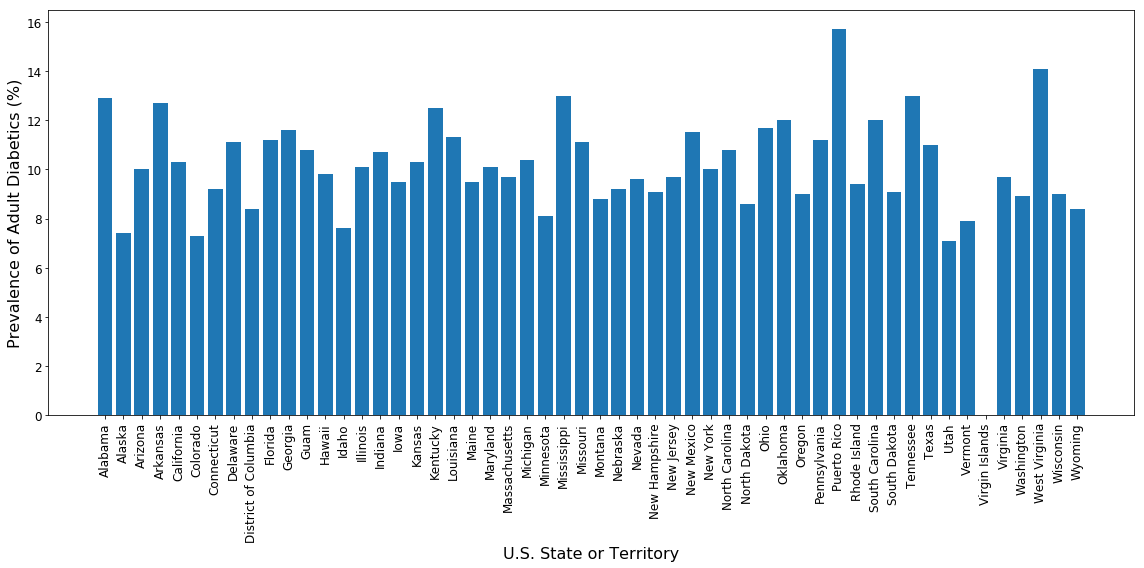

In [15]:
# Bar charts for diabetics 2014
x_pos = np.arange(len(merged_2014["US_State"]))
diabetics_2014 = list(merged_2014["Adult_Diabetics_Percent"])

plt.figure(figsize = (16,8))
plt.bar(x_pos, diabetics_2014)
plt.xticks(x_pos, merged_2014["US_State"], rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("U.S. State or Territory", fontsize = 16)
plt.ylabel("Prevalence of Adult Diabetics (%)", fontsize = 16)
plt.tight_layout()
plt.savefig("Images/states_diabetics_2014.png")

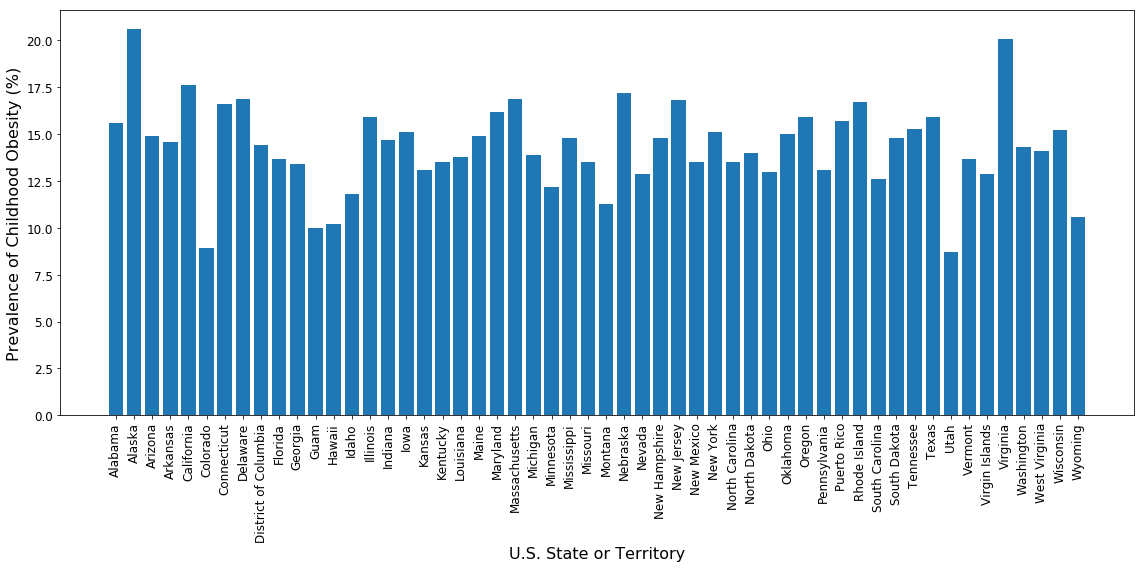

In [16]:
# Bar charts for obesity 2012
x_pos = np.arange(len(merged_2012["US_State"]))
obese_2012 = list(merged_2012["Obese_Children_Percent"])

plt.figure(figsize = (16,8))
plt.bar(x_pos, obese_2012)
plt.xticks(x_pos, merged_2012["US_State"], rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("U.S. State or Territory", fontsize = 16)
plt.ylabel("Prevalence of Childhood Obesity (%)", fontsize = 16)
plt.tight_layout()
plt.savefig("Images/states_obesity_2012.png")

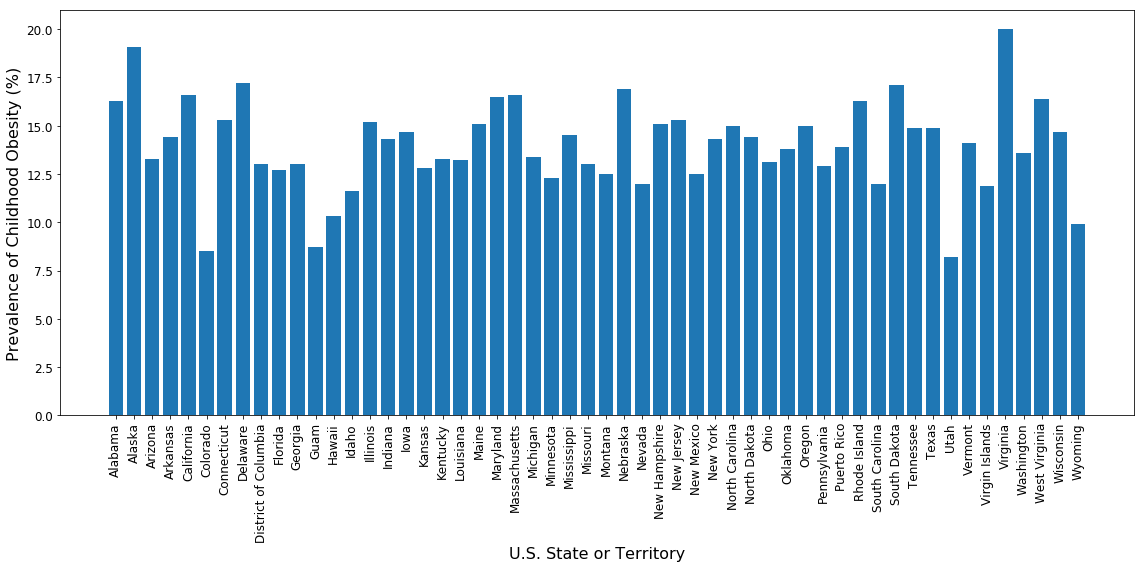

In [17]:
# Bar charts for obesity 2014
x_pos = np.arange(len(merged_2014["US_State"]))
obese_2014 = list(merged_2014["Obese_Children_Percent"])

plt.figure(figsize = (16,8))
plt.bar(x_pos, obese_2014)
plt.xticks(x_pos, merged_2014["US_State"], rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("U.S. State or Territory", fontsize = 16)
plt.ylabel("Prevalence of Childhood Obesity (%)", fontsize = 16)
plt.tight_layout()
plt.savefig("Images/states_obesity_2014.png")

In [18]:
# Diabetes: 2012 vs 2014
merged_diabetics = merged[["Year", "US_State", "Adult_Diabetics_Percent"]]
merged_diabetics = merged_diabetics.pivot(index = "US_State", columns = "Year")
merged_diabetics.head()

Adult_Diabetics_Percent      
Year                          2012  2014
US_State                                
Alabama                       12.2  12.9
Alaska                         7.0   7.4
Arizona                       10.6  10.0
Arkansas                      11.3  12.7
California                     9.8  10.3

In [19]:
# Obesity: 2012 vs 2014
merged_obesity = merged[["Year", "US_State", "Obese_Children_Percent"]]
merged_obesity = merged_obesity.pivot(index = "US_State", columns = "Year")
merged_obesity.head()

Obese_Children_Percent      
Year                         2012  2014
US_State                               
Alabama                      15.6  16.3
Alaska                       20.6  19.1
Arizona                      14.9  13.3
Arkansas                     14.6  14.4
California                   17.6  16.6

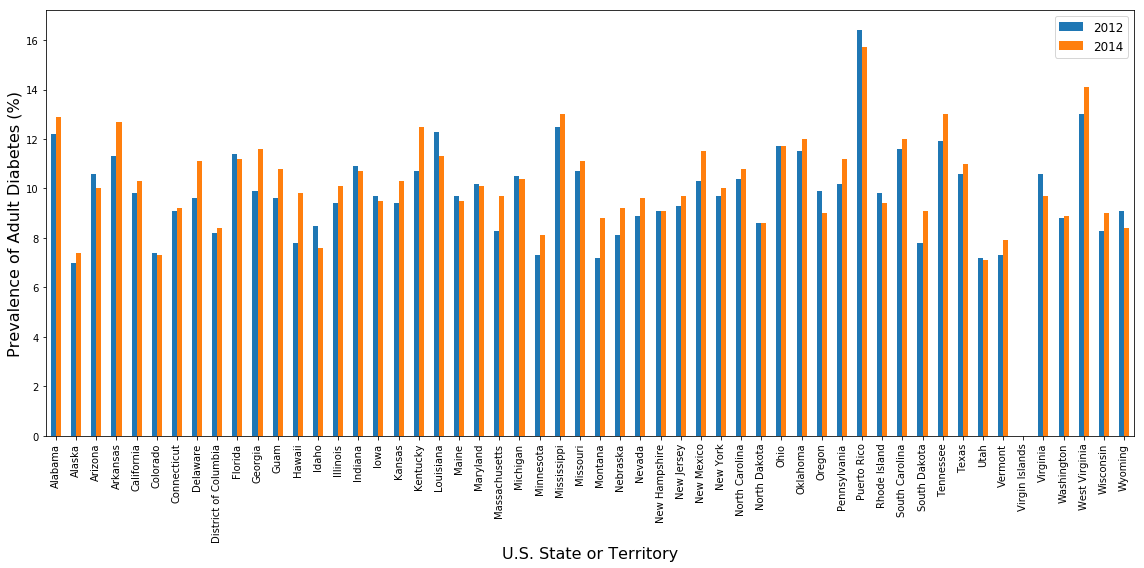

In [26]:
# Diabetics bar plot: 2012 vs 2014
ax = merged_diabetics.plot(kind = "bar", figsize = (16,8))
ax.set_xlabel("U.S. State or Territory", fontsize = 16)
ax.set_ylabel("Prevalence of Adult Diabetes (%)", fontsize = 16)
ax.legend(["2012","2014"], fontsize = 12)
plt.tight_layout()
plt.savefig("Images/diabetics_2012_2014.png")

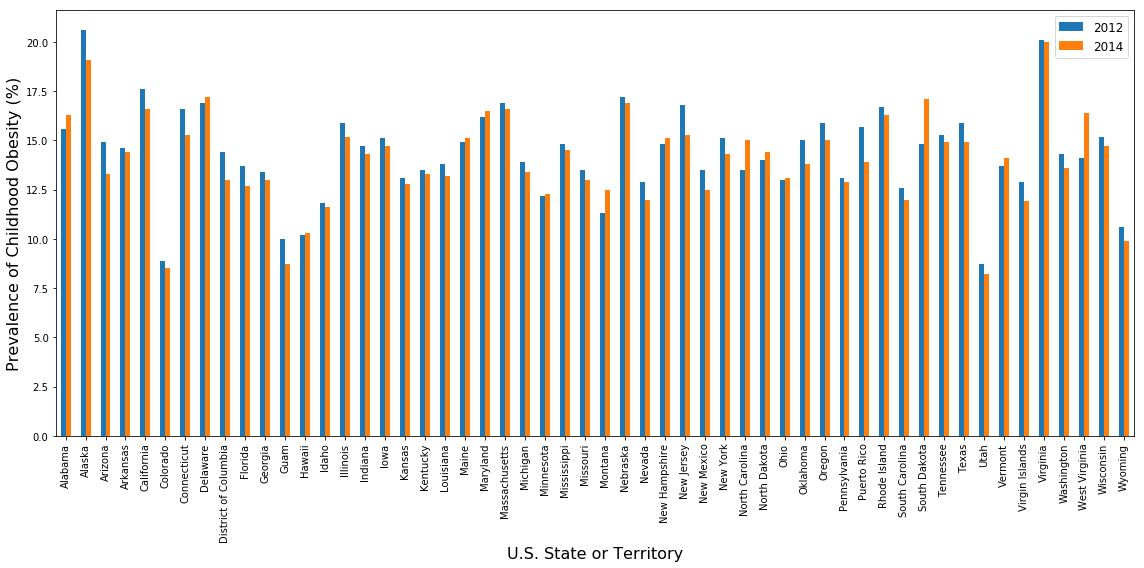

In [24]:
# Obesity bar plot: 2012 vs 2014
ax = merged_obesity.plot(kind = "bar", figsize = (16,8))
ax.set_xlabel("U.S. State or Territory", fontsize = 16)
ax.set_ylabel("Prevalence of Childhood Obesity (%)", fontsize = 16)
ax.legend(["2012","2014"], fontsize = 12)
plt.tight_layout()
plt.savefig("Images/obesity_2012_2014.png")